In [21]:
library(dplyr)

In [22]:
quality_prediction_and_page_views <- read.table("../results/sql_queries/entity_views_and_aggregated_revisions/entity_views_and_aggregated_revisions_and_quality_scoring_correlation.tsv", header=FALSE, sep="\t")

In [23]:
colnames(quality_prediction_and_page_views) <- c('yymm','spearman_corr_of_views_versus_quality', 'p')

In [24]:
monthly_bot_edits <- read.table("../results/wikidata_page_revisions_with_timestamp_bot_info/monthly_bot_edits_converted.tsv", header=FALSE, sep="\t")

In [25]:
colnames(monthly_bot_edits) <- c('yyyy','mm', 'yymm', 'prev_month_bot_edits_over_total', 'prev_month_bot_edits', 'prev_month_edits')

In [26]:
quality_predictions_and_page_views_and_monthly_bot_edits <- merge(monthly_bot_edits, quality_prediction_and_page_views, by='yymm')[c('yymm','prev_month_bot_edits_over_total', 'prev_month_bot_edits', 'prev_month_edits', 'spearman_corr_of_views_versus_quality', 'p')]

In [27]:
sorted_quality_prediction_and_page_views <- dplyr::arrange(quality_prediction_and_page_views, yymm)

In [28]:
sorted_quality_predictions_and_page_views_and_monthly_bot_edits <- dplyr::arrange(quality_predictions_and_page_views_and_monthly_bot_edits, yymm)

In [29]:
sorted_quality_prediction_and_page_views$row_number <- matrix(1:57,57,1)

In [30]:
sorted_quality_predictions_and_page_views_and_monthly_bot_edits$row_number <- matrix(1:56,56,1)

In [31]:
head(sorted_quality_predictions_and_page_views_and_monthly_bot_edits, n=60)

yymm,prev_month_bot_edits_over_total,prev_month_bot_edits,prev_month_edits,spearman_corr_of_views_versus_quality,p,row_number
1211,0.002649431,703,265340,0.40610964,4.559667e-174,1
1212,0.439382794,183981,418726,0.16410131,0.000000e+00,2
1301,0.907962344,1949811,2147458,0.09222488,0.000000e+00,3
1302,0.922694936,2337846,2533715,0.14043395,0.000000e+00,4
1303,0.862359141,2327478,2698966,0.17557653,0.000000e+00,5
1304,0.903903559,8256322,9134074,0.22929523,0.000000e+00,6
1305,0.948170642,13900943,14660803,0.23063940,0.000000e+00,7
1306,0.940258291,14463573,15382553,0.25586321,0.000000e+00,8
1307,0.817919933,3850902,4708165,0.25671401,0.000000e+00,9
1308,0.918788902,8355311,9093831,0.26641139,0.000000e+00,10


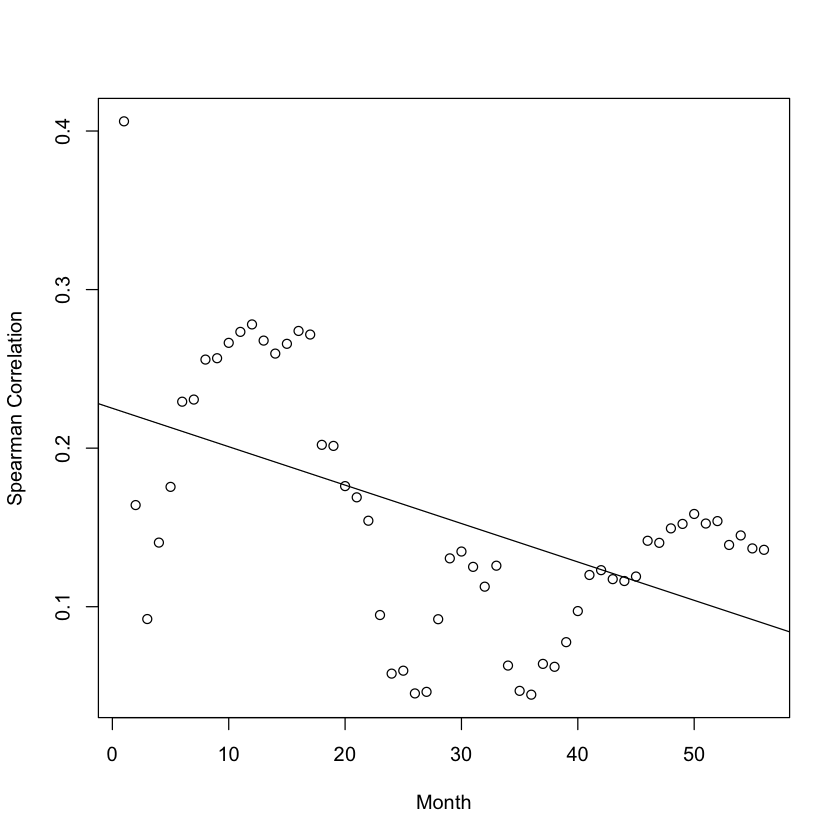

In [32]:
plot(sorted_quality_predictions_and_page_views_and_monthly_bot_edits$row_number, sorted_quality_predictions_and_page_views_and_monthly_bot_edits$spearman_corr_of_views_versus_quality, xlab="Month", ylab="Spearman Correlation")
abline(lm(sorted_quality_prediction_and_page_views$spearman_corr_of_views_versus_quality ~ sorted_quality_prediction_and_page_views$row_number))

In [33]:
cor(sorted_quality_prediction_and_page_views$row_number,sorted_quality_prediction_and_page_views$spearman_corr_of_views_versus_quality, method="spearman")

-0.4522297


In [34]:
summary(lm(sorted_quality_prediction_and_page_views$spearman_corr_of_views_versus_quality ~ sorted_quality_prediction_and_page_views$row_number))


Call:
lm(formula = sorted_quality_prediction_and_page_views$spearman_corr_of_views_versus_quality ~ 
    sorted_quality_prediction_and_page_views$row_number)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.125695 -0.053034 -0.000359  0.050621  0.183343 

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                          0.2251899  0.0177499
sorted_quality_prediction_and_page_views$row_number -0.0024234  0.0005324
                                                    t value Pr(>|t|)    
(Intercept)                                          12.687  < 2e-16 ***
sorted_quality_prediction_and_page_views$row_number  -4.552 2.98e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06612 on 55 degrees of freedom
Multiple R-squared:  0.2737,	Adjusted R-squared:  0.2605 
F-statistic: 20.72 on 1 and 55 DF,  p-value: 2.98e-05


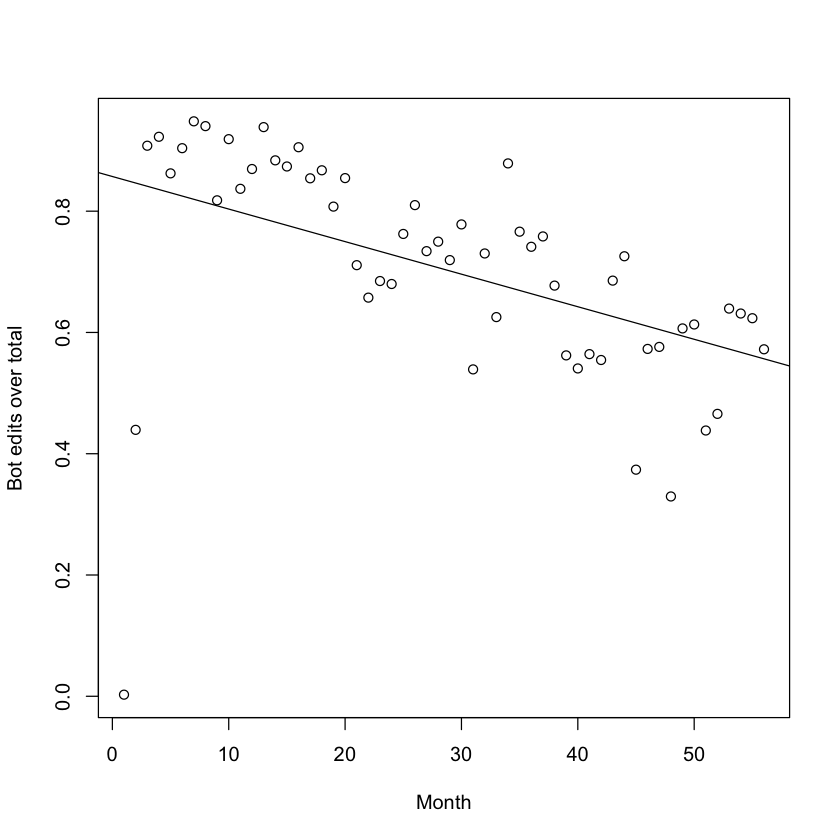

In [35]:
plot(sorted_quality_predictions_and_page_views_and_monthly_bot_edits$row_number, sorted_quality_predictions_and_page_views_and_monthly_bot_edits$prev_month_bot_edits_over_total, xlab="Month", ylab="Bot edits over total")
abline(lm(sorted_quality_predictions_and_page_views_and_monthly_bot_edits$prev_month_bot_edits_over_total ~ sorted_quality_predictions_and_page_views_and_monthly_bot_edits$row_number))

In [36]:
cor(sorted_quality_predictions_and_page_views_and_monthly_bot_edits$row_number, sorted_quality_predictions_and_page_views_and_monthly_bot_edits$prev_month_bot_edits_over_total, method="spearman")

-0.662406


In [37]:
summary(lm(sorted_quality_predictions_and_page_views_and_monthly_bot_edits$prev_month_bot_edits_over_total ~ sorted_quality_predictions_and_page_views_and_monthly_bot_edits$row_number))


Call:
lm(formula = sorted_quality_predictions_and_page_views_and_monthly_bot_edits$prev_month_bot_edits_over_total ~ 
    sorted_quality_predictions_and_page_views_and_monthly_bot_edits$row_number)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84921 -0.04856  0.04118  0.08929  0.20414 

Coefficients:
                                                                            Estimate
(Intercept)                                                                 0.857224
sorted_quality_predictions_and_page_views_and_monthly_bot_edits$row_number -0.005370
                                                                           Std. Error
(Intercept)                                                                  0.043685
sorted_quality_predictions_and_page_views_and_monthly_bot_edits$row_number   0.001333
                                                                           t value
(Intercept)                                                                 19.623
sor

In [38]:
cor(sorted_quality_predictions_and_page_views_and_monthly_bot_edits$spearman_corr_of_views_versus_quality, sorted_quality_predictions_and_page_views_and_monthly_bot_edits$prev_month_bot_edits_over_total, method="spearman")

[1] 0.289337

In [39]:
summary(lm(sorted_quality_predictions_and_page_views_and_monthly_bot_edits$prev_month_bot_edits_over_total ~ sorted_quality_predictions_and_page_views_and_monthly_bot_edits$spearman_corr_of_views_versus_quality))


Call:
lm(formula = sorted_quality_predictions_and_page_views_and_monthly_bot_edits$prev_month_bot_edits_over_total ~ 
    sorted_quality_predictions_and_page_views_and_monthly_bot_edits$spearman_corr_of_views_versus_quality)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.75313 -0.10393  0.03216  0.14159  0.22847 

Coefficients:
                                                                                                      Estimate
(Intercept)                                                                                            0.67228
sorted_quality_predictions_and_page_views_and_monthly_bot_edits$spearman_corr_of_views_versus_quality  0.20560
                                                                                                      Std. Error
(Intercept)                                                                                              0.05516
sorted_quality_predictions_and_page_views_and_monthly_bot_edits$spearman_corr_of_views_versus_qu